<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# <center>Used Car Prices - Linear Regression</center>
  <center>By : Mahesh Ambokar - Jan 2021 Cohort</center>

# Project Description

## Company Introduction
    •	SWIPECAR, is an American company that buys and sells second hand cars.
    •	They initiated their business in the late 80s and have gained huge popularity over the years.
    •	The company clients are local and foreign customers who seek to buy and sell second hand cars.


## Current Scenario
    •	Company has started facing loss in business due to the technical advancements.
    •	There are several competitors in the market who have been using enhanced techniques.
    •	The company is pretty old and they have been using traditional measures to estimate old cars prices.
    •	These traditional measures include weight analysis, condition of parts and build year.
    •	They are looking for a more robust way to estimate the price of old cars.


##  Problem Statement  

#### The current process suffers from the following problems:  

    1. They have been using manual traditional measures to estimate old cars prices.  

    2. These measures are time consuming and not accurate.  

    3. Company is looking for a robust way to estimate the prices of used cars.  

    Recently they got to know about data scientists who help businesses to sort out such issues. 
    They decided to hire a team of data scientists. Consider you are one of them.


## My Role
    •	You will be given a set of data to predict the prices of used cars based on their features.
    •	You need to find an automated way to get rid of their manual work.
    •	Your task is to build a regression model using the provided data.


## Project Deliverables
    •	Deliverable: Predict the prices of used cars.
    •	Machine Learning Task: Regression
    •	Target Variable: Price
    •	Win Condition: N/A (best possible model)


## Evaluation Metric
    •	The model evaluation will be based on the RMSE score.



# **1. Data Acquisition & Description**

#### The company has been collecting information about the prices of used cars in an excel workbook.

    This data set consists of three types of entities:
    
    1.	The specification of an auto in terms of various characteristics
    
    2.	The assigned insurance risk rating
    
    3.	Normalized losses in use as compared to other cars
    
    Insurance risk:

    The second rating corresponds to the degree to which the auto is riskier than its price indicates.
    
    •	Cars are initially assigned a risk factor symbol associated with its price.
    •	Then, if it is more or less risky this symbol is adjusted by moving it up or down the scale.
    •	Actuaries calls this process "symbolling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.


    Normalized losses:

    The third factor is the relative average loss payment per insured vehicle year. 
    •	This value is normalized for all autos within a particular size classification 
    (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.


## 1.1 Data Files
    Train Set:
    •	The train set contains 181 rows and 27 columns.
    •	The last column price is the target variable.

    Test Set:
    •	The test set contains 20 rows and 26 columns.
    •	The test set doesn’t contain the price column.
    •	It needs to be predicted for the test set.


In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")    

In [140]:
## Loading Train Data Set
car = pd.read_csv("TrainData.csv")
car.head()
#car.shape

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [141]:
## Loading External Client/Project Subimission Data Set
car_ext = pd.read_csv("TestData.csv")
car_ext.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28
1,2,0,188,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121,4250,21,28
2,3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162,5100,17,22
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69,5200,31,37


| Column Name	           | Description|
|--------------------------|---------------------------|
|ID                     | Feature uniquely identifying each record |
|symbolling             | Degree to which the auto is riskier than its price indicates. |
|normalized-losses      |Relative average loss payment per insured vehicle year |
|make	|Make of the car.|
|fuel-type	|Type of fuel consumed by the car.|
|aspiration	|Type of internal combustion engine used.|
|num-of-doors|	Number of doors available in the car.|
|body-style	|Body style of car.|
|drive-wheels	|Drive wheel of car.|
|engine-location	|Location of engine in car.|
|wheel-base	|Distance between the centres of the front and rear wheels.|
|length	|Length of the car.|
|width	|Width of the car.|
|height	|Height of the car.|
|curb-weight	|Total mass of a vehicle with standard equipment.|
|engine-type	|Type of engine used in the car.|
|num-of-cylinders|	Number of cylinders used in the car.|
|engine-size	|Size of the engine used in the car.|
|fuel-system	|Type of fuel system used in the car.|
|bore	|Diameter of each cylinder in the piston engine.|
|stroke	|Full travel of the piston along the cylinder, in either direction.|
|compression-ratio|Volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top.|
|horsepower	|The power an engine produces by a car.|
|peak-rpm	|The max power produced by engine in terms of revolutions per minute.|
|city-mpg	|City mileage per gallon rating of car.|
|highway-mpg	|Highway mileage per gallon rating of car.|
|price	|Price of the car.|


<a name = Section41></a>
### **1.2 Data Description and Pre-Processing**

- In this section we will get **information about the data** and see some observations.

In [142]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [143]:
car.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000
mean,91.00000,0.85083,98.72928,174.17403,65.94365,53.70994,2564.16575,127.90055,10.15425,25.13260,30.64641,13271.31492
std,52.39434,1.26704,6.11620,12.33657,2.14611,2.49773,523.48902,42.57844,3.98231,6.41821,6.88855,8106.47963
min,1.00000,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,7.00000,13.00000,16.00000,5118.00000
25%,46.00000,0.00000,94.50000,166.80000,64.20000,51.60000,2190.00000,98.00000,8.60000,19.00000,25.00000,7775.00000
50%,91.00000,1.00000,96.90000,173.20000,65.50000,54.10000,2420.00000,120.00000,9.00000,24.00000,30.00000,10295.00000
75%,136.00000,2.00000,102.40000,183.10000,66.60000,55.50000,2935.00000,146.00000,9.40000,30.00000,34.00000,16500.00000
max,181.00000,3.00000,120.90000,208.10000,72.00000,59.80000,4066.00000,326.00000,23.00000,49.00000,54.00000,45400.00000


**Observations:**

1. From info function it can be concluded that data set has:
        1.1. Numeric fields: 11
        1.2. Non-Numeric Fields:15
        
2. By having look on sample data using head function and by definition in data description section the column    namely "normalized-losses" should have numeric data type. But they are showing data tye of object. So need to scan these columns for existing values using values_count.

3. ID column is identity column car having distinct values so can be ignore.

4. Some fields such as bore,horsepower,num-of doors , num-of-cyliders shpould be numeric but looks object. Need to process the same by looking into vlaue count fuction.

5. For below columns Median > Mean (Positively Skewed)
    5.1 Price
    5.2 highway-mpg
    5.3 city-mpg
    5.4 Engine-Size
    5.5 curb-weight
    5.6 Height
    5.7 width
    5.8 length 
    5.9 wheel-base
    5.10 symboling
6. For below columns Median < Mean (negatively Skewed)
    6.1 compression-ratio


<a name = Section41></a>
### **1.3 Data Cleaning & Processing**

- In this section we will get **information about the data** and see some observations.

In [144]:
# Check any issue in spelling of car make column
car["make"].unique()

array(['toyota', 'bmw', 'renault', 'peugot', 'volvo', 'dodge', 'jaguar',
       'porsche', 'subaru', 'mitsubishi', 'volkswagen', 'honda', 'mazda',
       'mercedes-benz', 'saab', 'nissan', 'mercury', 'plymouth', 'audi',
       'chevrolet', 'isuzu', 'alfa-romero'], dtype=object)

##### Data Cleaning for Train n Test Data 

In [145]:
# display(car[car["normalized-losses"]=="?"]["normalized-losses"].value_counts())
# Create New column : normalized-losses2 from normalized-losses and
# replace unwanted "?" to Np.Nan and replace it by Mean

car["normalized-losses2"] = car["normalized-losses"]
car["normalized-losses2"] =pd.to_numeric(car["normalized-losses2"].astype(str).replace("?",np.NaN))

# sns.set_style("whitegrid")
# fig, ax =plt.subplots(1,1)

# display(car["normalized-losses2"].mean())
car["normalized-losses2"].fillna(value=car["normalized-losses2"].mean(),inplace=True)

#sns.boxplot(data=car,x="normalized-losses2")
#display(car["normalized-losses2"].mean())

#_____________Bore___________________________________

car["bore2"] = car["bore"]
car["bore2"] =pd.to_numeric(car["bore2"].astype(str).replace("?",np.NaN))
# display(car["bore2"].mean())
car["bore2"].fillna(value=car["bore2"].mean(),inplace=True)
                            
#_______num-of-doors
display(car["num-of-doors"].value_counts())
car["num-of-doors2"]  = car["num-of-doors"] 
car["num-of-doors2"] = pd.DataFrame(car["num-of-doors2"].astype(str).replace("?","four"))
car["num-of-doors2"] = pd.DataFrame(car["num-of-doors2"].astype(str).replace("two","2"))
car["num-of-doors2"] = pd.to_numeric(car["num-of-doors2"].astype(str).replace("four","4"))
display(car["num-of-doors2"].value_counts())


# ______ Stroke , horsepower , peak-rpm columns:  replace non numeric value with mean
car["stroke2"] = car["stroke"]
car["stroke2"] =pd.to_numeric(car["stroke2"].astype(str).replace("?",np.NaN))
display(car["stroke2"].mean())
car["stroke2"].fillna(value=car["stroke2"].mean(),inplace=True)

car["horsepower2"] = car["horsepower"]
car["horsepower2"] =pd.to_numeric(car["horsepower2"].astype(str).replace("?",np.NaN))
display(car["horsepower2"].mean())
car["horsepower2"].fillna(value=car["horsepower2"].mean(),inplace=True)

car["peak-rpm2"] = car["peak-rpm"]
car["peak-rpm2"] =pd.to_numeric(car["peak-rpm2"].astype(str).replace("?",np.NaN))
display(car["peak-rpm2"].mean())
car["peak-rpm2"].fillna(value=car["peak-rpm2"].mean(),inplace=True)





four    102
two      77
?         2
Name: num-of-doors, dtype: int64

4    104
2     77
Name: num-of-doors2, dtype: int64

3.274463276836154

104.16759776536313

5106.703910614525

##### Data Cleaning for External Data 

In [146]:
# display(car[car["normalized-losses"]=="?"]["normalized-losses"].value_counts())
# Create New column : normalized-losses2 from normalized-losses and
# replace unwanted "?" to Np.Nan and replace it by Mean

car_ext["normalized-losses2"] = car_ext["normalized-losses"]
car_ext["normalized-losses2"] =pd.to_numeric(car_ext["normalized-losses2"].astype(str).replace("?",np.NaN))
# display(car["normalized-losses2"].mean())
car_ext["normalized-losses2"].fillna(value=car_ext["normalized-losses2"].mean(),inplace=True)

#_____________Bore___________________________________
car_ext["bore2"] = car_ext["bore"]
car_ext["bore2"] =pd.to_numeric(car_ext["bore2"].astype(str).replace("?",np.NaN))
# display(car["bore2"].mean())
car_ext["bore2"].fillna(value=car_ext["bore2"].mean(),inplace=True)
                            
#_______num-of-doors
display(car_ext["num-of-doors"].value_counts())
car_ext["num-of-doors2"]  = car_ext["num-of-doors"] 
car_ext["num-of-doors2"] = pd.DataFrame(car_ext["num-of-doors2"].astype(str).replace("?","four"))
car_ext["num-of-doors2"] = pd.DataFrame(car_ext["num-of-doors2"].astype(str).replace("two","2"))
car_ext["num-of-doors2"] = pd.to_numeric(car_ext["num-of-doors2"].astype(str).replace("four","4"))
display(car_ext["num-of-doors2"].value_counts())


# ______ Stroke , horsepower , peak-rpm columns:  replace non numeric value with mean
car_ext["stroke2"] = car_ext["stroke"]
car_ext["stroke2"] =pd.to_numeric(car_ext["stroke2"].astype(str).replace("?",np.NaN))
display(car_ext["stroke2"].mean())
car_ext["stroke2"].fillna(value=car_ext["stroke2"].mean(),inplace=True)

car_ext["horsepower2"] = car_ext["horsepower"]
car_ext["horsepower2"] =pd.to_numeric(car_ext["horsepower2"].astype(str).replace("?",np.NaN))
display(car_ext["horsepower2"].mean())
car_ext["horsepower2"].fillna(value=car_ext["horsepower2"].mean(),inplace=True)

car_ext["peak-rpm2"] = car_ext["peak-rpm"]
car_ext["peak-rpm2"] =pd.to_numeric(car_ext["peak-rpm2"].astype(str).replace("?",np.NaN))
display(car_ext["peak-rpm2"].mean())
car_ext["peak-rpm2"].fillna(value=car_ext["peak-rpm2"].mean(),inplace=True)



four    11
two      9
Name: num-of-doors, dtype: int64

4    11
2     9
Name: num-of-doors2, dtype: int64

3.1014999999999997

96.5

5215.0

<a name = Section5></a>

---
# **2. EDA**
---

In [147]:
car_eda =  car[['symboling','normalized-losses2','make','fuel-type','aspiration','num-of-doors2','body-style', \
               'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight',\
               'engine-type','num-of-cylinders', 'engine-size','fuel-system','bore2','stroke2', \
                'compression-ratio','horsepower2','peak-rpm2',\
                'city-mpg','highway-mpg','price']] 
# 'num-of-cylinders2',
car_eda.head()

,symboling,normalized-losses2,make,fuel-type,aspiration,num-of-doors2,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore2,stroke2,compression-ratio,horsepower2,peak-rpm2,city-mpg,highway-mpg,price
0,-1,65.00000,toyota,gas,std,4,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31000,3.54000,8.70000,92.00000,4200.00000,27,32,11248
1,0,188.00000,bmw,gas,std,2,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121.00000,4250.00000,21,28,20970
2,0,120.86395,renault,gas,std,4,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46000,3.90000,8.70000,104.16760,5106.70391,23,31,9295
3,0,161.00000,peugot,diesel,turbo,4,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.70000,3.52000,21.00000,95.00000,4150.00000,28,33,13200
4,-2,103.00000,volvo,gas,std,4,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114.00000,5400.00000,24,28,15985


In [148]:
car_eda_ext =  car_ext[['symboling','normalized-losses2','make','fuel-type','aspiration','num-of-doors2','body-style', \
               'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight',\
               'engine-type','num-of-cylinders', 'engine-size','fuel-system','bore2','stroke2', \
                'compression-ratio','horsepower2','peak-rpm2',\
                'city-mpg','highway-mpg']] 
# 'num-of-cylinders2',
#car_eda.head()

## 2.1 Target Variable Analysis 

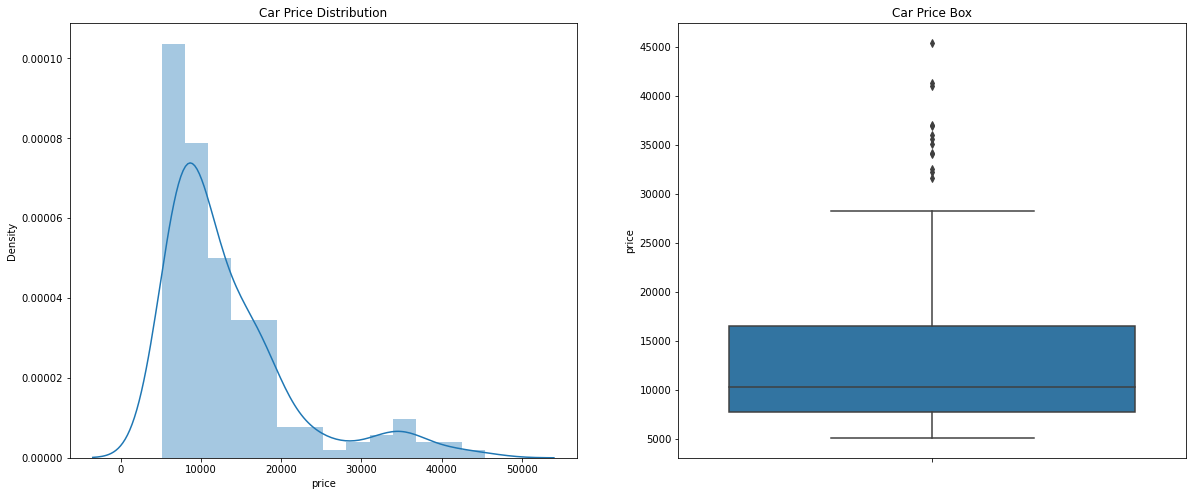

In [149]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(car.price)

plt.subplot(1,2,2)
plt.title('Car Price Box')
sns.boxplot(y=car.price)

plt.show()

Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers). Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile.

In [150]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))
car_q = car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

iqr = (car_q['75%'] - car_q['25%'])
lower_bound = car_q['25%'] -(2.5 * iqr) 
upper_bound = car_q['75%']  +(2.5* iqr) # as data is right skewed more 
lower_bound,upper_bound

count     181.00000
mean    13271.31492
std      8106.47963
min      5118.00000
25%      7775.00000
50%     10295.00000
75%     16500.00000
85%     18420.00000
90%     22625.00000
100%    45400.00000
max     45400.00000
Name: price, dtype: float64


(-14037.5, 38312.5)

In [151]:
car = car[car['price']<upper_bound]

1 The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2 There is a significant difference between the mean and the median of the price distribution.

3 The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the    prices are below 18,420, whereas the remaining 15% are between 18,420 and 45,400.)


## 2.2 Dependent Variable Analysis

   ### 2.2.1 Dependent Categorocal Variables Analysis - Value Counts

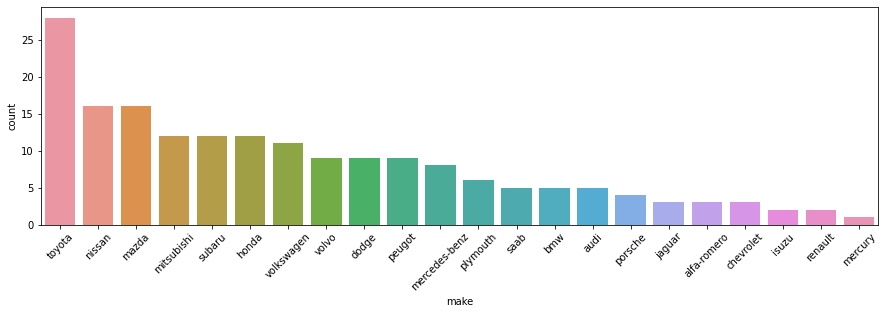

In [152]:
# Plot Bar chart/graph of Count of Cars data by following catogorical varaiables

# make wise / body type /drive wheels /engine location / numeber of cyliders 

# Creating subplot axes
fig, axes = plt.subplots(1, 1, figsize=(15, 4), sharey=False)
# make
#  3   make                181 non-null    object 
sns.countplot(   data =car_eda, x='make',order = car_eda['make'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

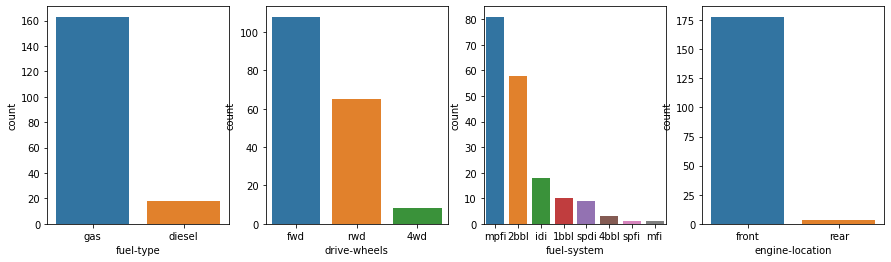

In [153]:
# Plot Bar chart/graph of Count of Cars data by following catogorical varaiables

# body type /drive wheels /engine location / numeber of cyliders 
# Creating subplot axes
fig, axes = plt.subplots(1, 4, figsize=(15, 4 ), sharey=False)
# fuel-type

#sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
sns.countplot(ax=axes[0], data =car_eda, x='fuel-type',order = car_eda['fuel-type'].value_counts().index)
#axes[0].set_title('fuel-type')

# body-style 
sns.countplot(ax=axes[1], data =car_eda, x='drive-wheels',order = car_eda['drive-wheels'].value_counts().index)
#axes[1].set_title('body-style')

#fuel-system
sns.countplot(ax=axes[2], data =car_eda, x='fuel-system',order = car_eda['fuel-system'].value_counts().index)
#axes[2].set_title('body-style')
fig.xtick = 45

#engine-location
sns.countplot( ax=axes[3], data =car_eda, x='engine-location',order = car_eda['engine-location'].value_counts().index)

plt.show()


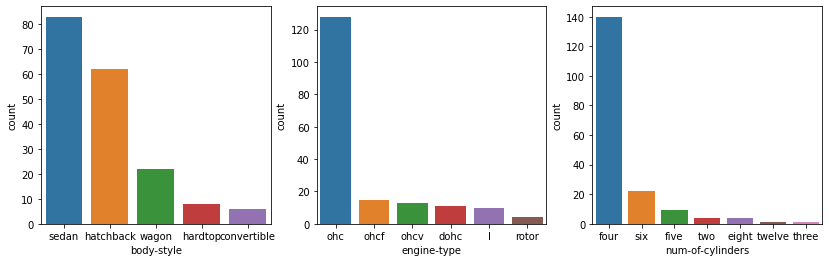

In [154]:

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=False)
#body-style
sns.countplot(ax=axes[0], data =car_eda, x='body-style',order = car_eda['body-style'].value_counts().index)
#axes[3].set_title('body-style')

#engine-type
sns.countplot(ax=axes[1], data =car_eda, x='engine-type',order = car_eda['engine-type'].value_counts().index)


#num-of-cylinders
sns.countplot(ax=axes[2], data =car_eda, x='num-of-cylinders',order = car_eda['num-of-cylinders'].value_counts().index)

plt.show()



In [155]:
car_eda['symboling'].value_counts()

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64

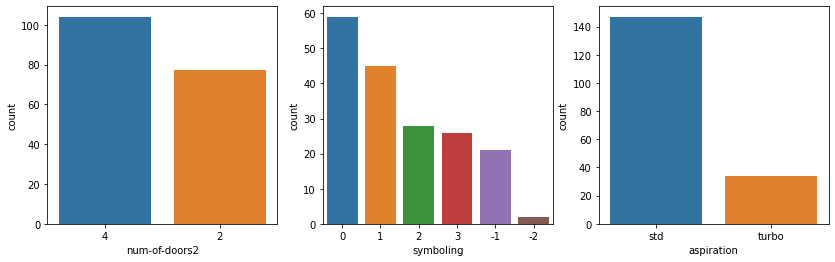

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=False)
#num-of-doors
sns.countplot(ax=axes[0], data =car_eda, x='num-of-doors2',order = car_eda['num-of-doors2'].value_counts().index)
#symboling
sns.countplot(ax=axes[1], data =car_eda, x='symboling',order = car_eda['symboling'].value_counts().index)

# aspiration
sns.countplot(ax=axes[2], data =car_eda, x='aspiration',order = car_eda['aspiration'].value_counts().index)
plt.show()

## Observation
    1. Makewise Top 5  : Toyoto,nissan,mazda,honda,mitsubishi
        Toyota seemed to be favored car company.
        
    2  Body-Style-wise Top :Sedan,Hatchback,wagon,herdtop,covertible
        Sedan is the top car type prefered.
        
    3  Drive Wheel : front, rear, 4 wheel drive 
        Front Wheel Drive is the common in use.
        
    4  engine-location: have only two type front and rear(very few)
        Front Engine location has more vehicle count 
        
    5. Fuel-Type: Gas/Diesel 
        Number of gas fueled cars are more than diesel.
        
    6. Symboling with 0 and 1 values have high number of rows (They may be most sold)
    
    7  Aspiration with value "std" are more than "turbo"
    
    8 Number of doors : Have two values as exepcted 4 & 2 
    
    9 Engine-Style: OHC has highest values count(Overhead Cam Shaft style engine is very faous for its efficiancy and design.) 
    
    



  ### 2.2.2 Categorical Variables(Dependent)  Vs Price (Target Variable)

<Figure size 1440x576 with 0 Axes>

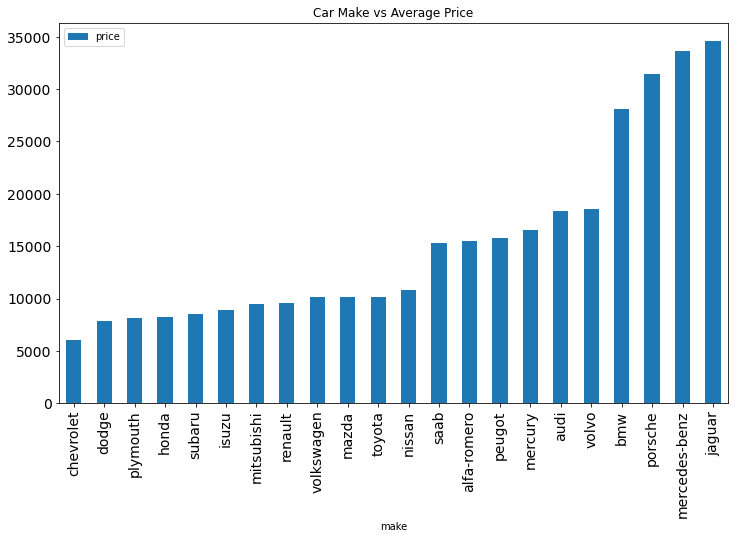

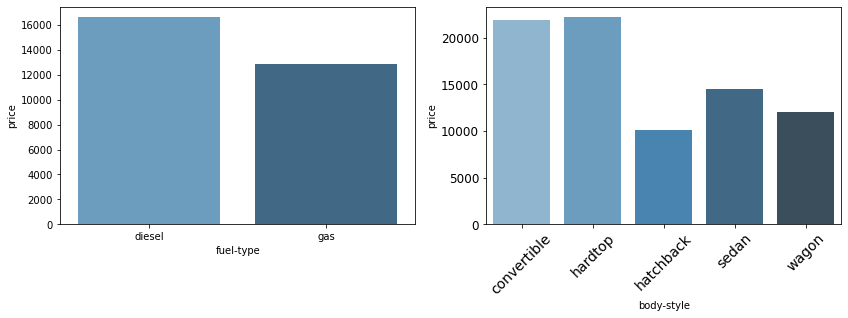

In [157]:
# Car Make Vs Price Trend

plt.figure(figsize=(20,8))

df = pd.DataFrame(car_eda.groupby(['make'])['price'].mean().sort_values(ascending = True))
df.plot.bar(figsize=(12,7))
plt.title('Car Make vs Average Price')
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

#plt.title('Fuel Type VS Average Price')
df2 = pd.DataFrame(car_eda.groupby(['fuel-type'])['price'].mean().reset_index())
sns.barplot(ax=axes[0], x = df2['fuel-type'],y=df2['price'], palette=("Blues_d"))
plt.xticks(rotation=45)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 12)

#plt.title('Fuel Type VS Average Price')
df2 = pd.DataFrame(car_eda.groupby(['body-style'])['price'].mean().reset_index())
sns.barplot(ax=axes[1], x = df2['body-style'],y=df2['price'], palette=("Blues_d"))
plt.xticks(rotation=45)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 12)

plt.show()

1 Jaguar,Mercedes-benz,porsche,bmw are top average price make 

2 Chervolet,Dogde,plymouth,honda subanu,isuzu, are bottom five average proce makes

3 Convertible,Hardtop are high average price

4.Diesel has higher average price than gas.


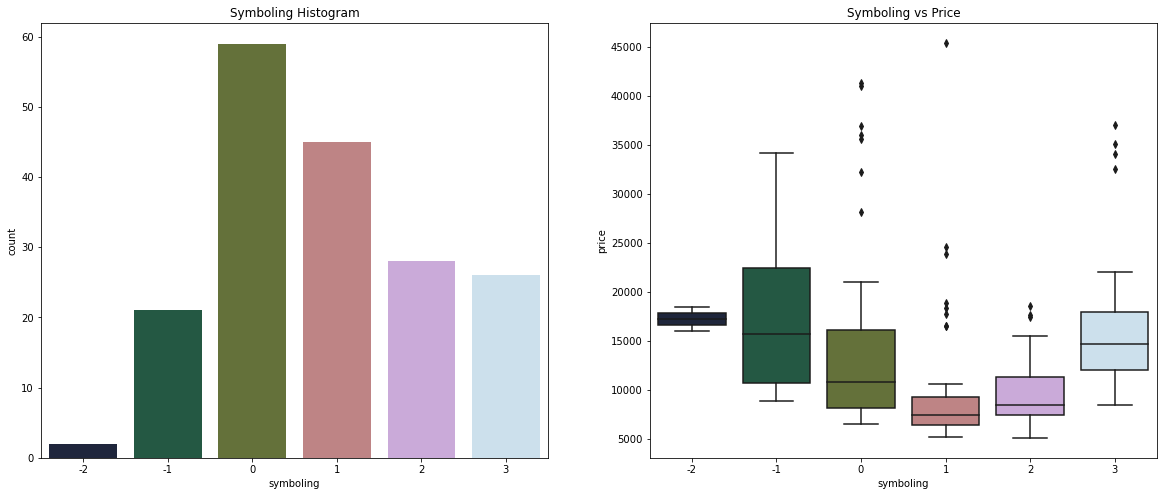

In [158]:
#Symboling Vs Price 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(car_eda['symboling'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_eda.symboling, y=car_eda.price, palette=("cubehelix"))

plt.show()

1. Symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). 

3. But it seems that symboling with 3 value has the price range similar to -2 value. 

4. There is a dip in price at symboling 1.

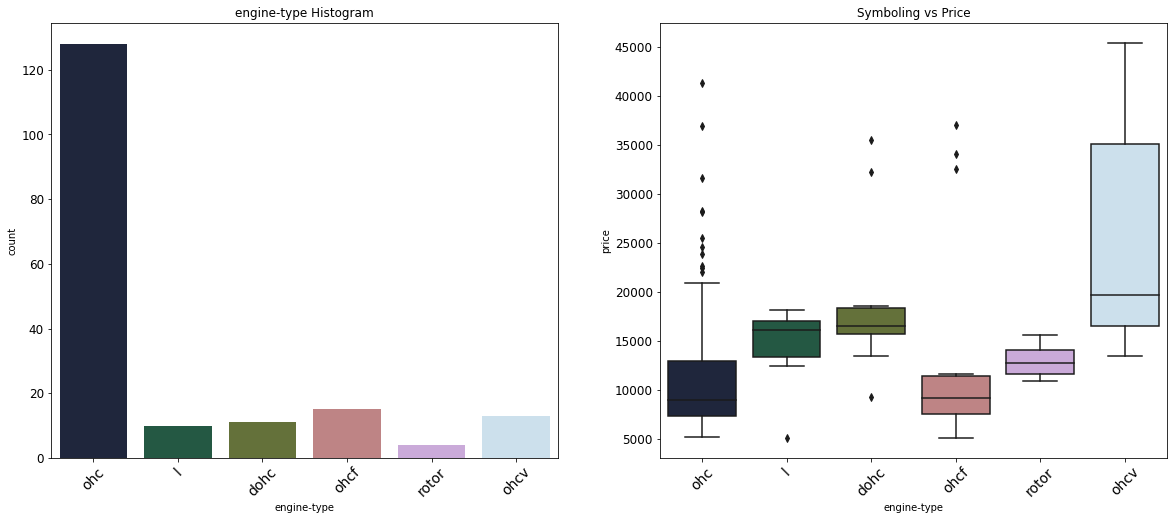

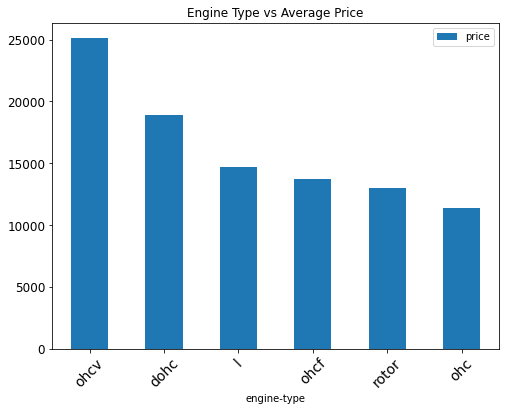

In [159]:
# engine-type
#engine-type Vs Price 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('engine-type Histogram')
sns.countplot(car_eda['engine-type'], palette=("cubehelix"))
plt.xticks(rotation=45)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 12)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_eda["engine-type"], y=car_eda.price, palette=("cubehelix"))
plt.xticks(rotation=45)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 12)
plt.show()

df = pd.DataFrame(car_eda.groupby(['engine-type'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.xticks(rotation=45)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 12)
plt.show()


    1. ohc Engine type seems to be most favored type.
    
    2. ohcv has the highest price range 
    
    3. ohc and ohcf have the low price range.

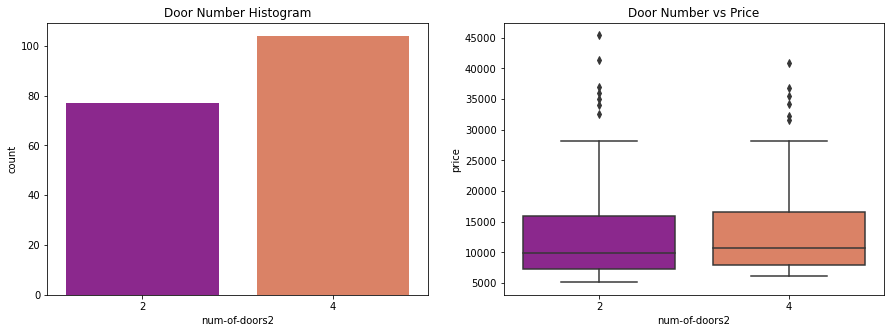

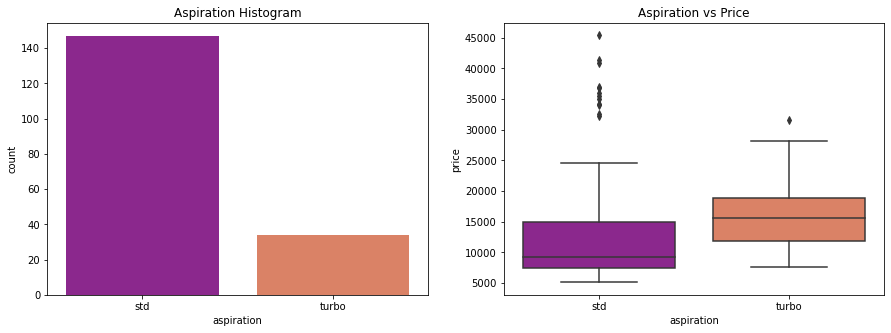

In [160]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_eda["num-of-doors2"], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_eda["num-of-doors2"], y=car_eda["price"], palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_eda.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_eda.aspiration, y=car_eda.price, palette=("plasma"))

plt.show()


    1. Doornumber variable is not affacting the price much. There is no significant difference between the categories in it.
    
    2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

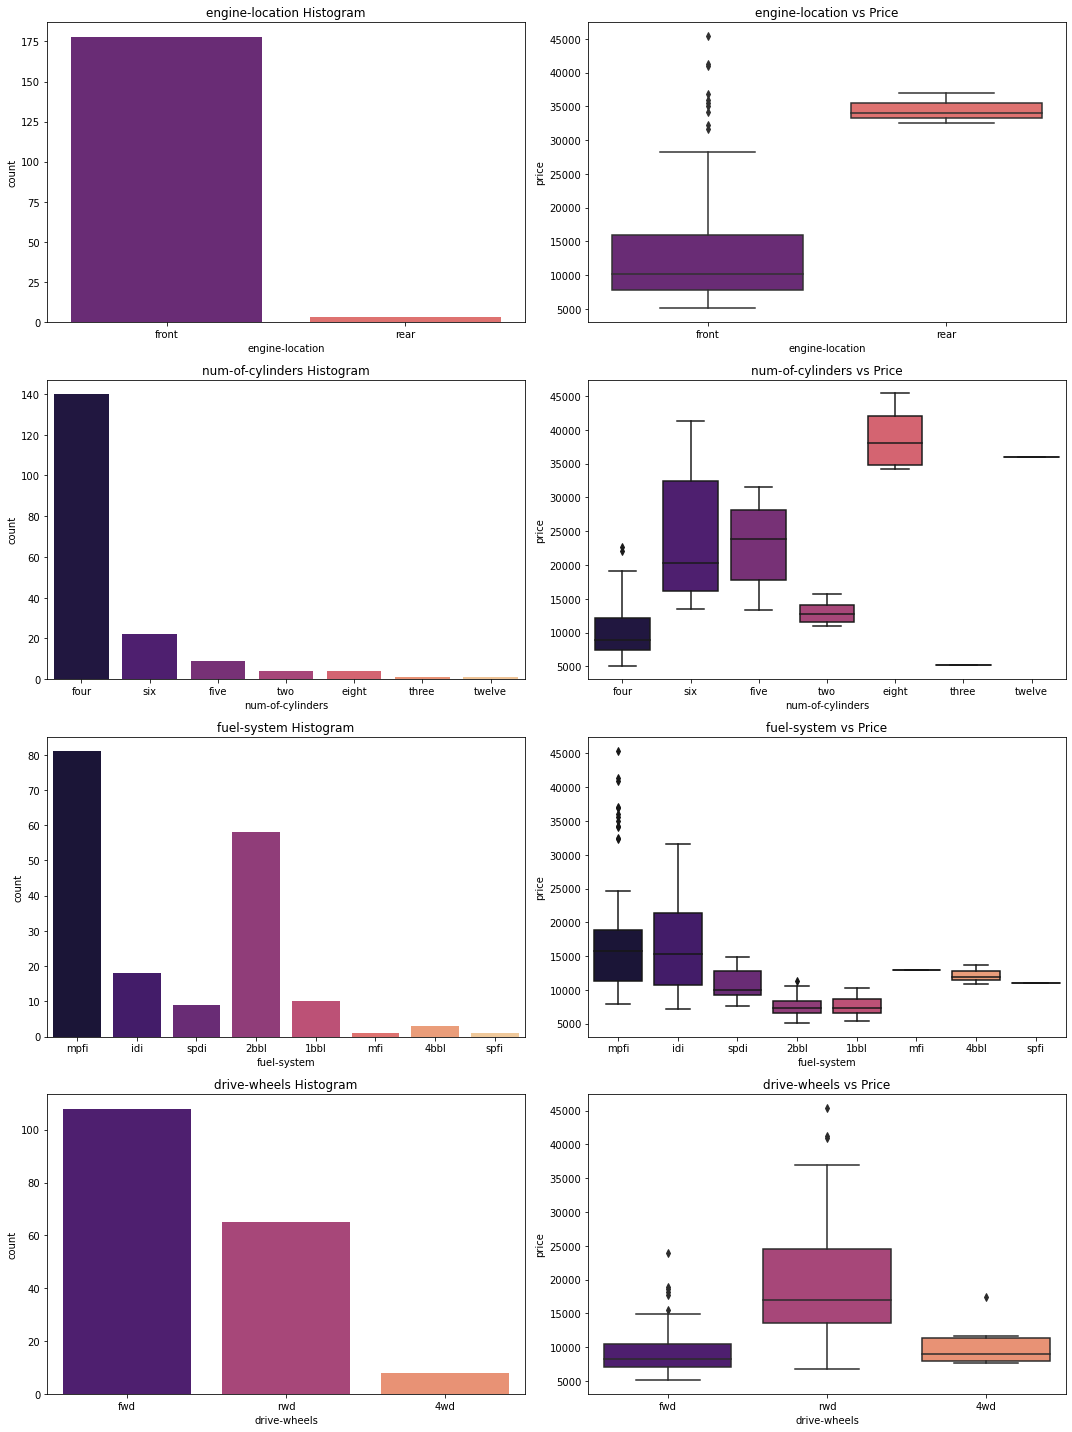

In [161]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(car_eda[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car_eda[x], y=car_eda.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('engine-location', 1)
plot_count('num-of-cylinders', 3)
plot_count('fuel-system', 5)
plot_count('drive-wheels', 7)

plt.tight_layout()


1. Very few datapoints for engine location categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

  ### 2.2.3 Continuous Variables(Dependent)  Vs Price (Target Variable)

In [162]:
def car_scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(car_eda[x],car_eda['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

In [163]:
def car_pair_plot(x,y,z):
    sns.pairplot(data=car_eda, x_vars=[x,y,z], y_vars='price',diag_kind=None,size=4, aspect=1, kind='scatter')
    #sns.pairplot(data=car_eda, x_vars=[x,y,z,'price'], y_vars=[x,y,z,'price'],size=2, aspect=1, kind='scatter')
    plt.show()

 

<Figure size 720x1440 with 0 Axes>

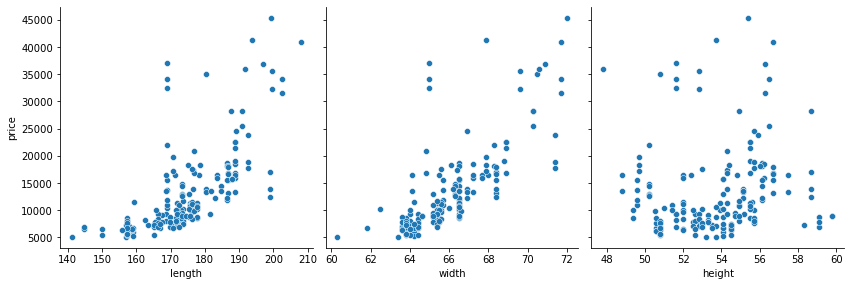

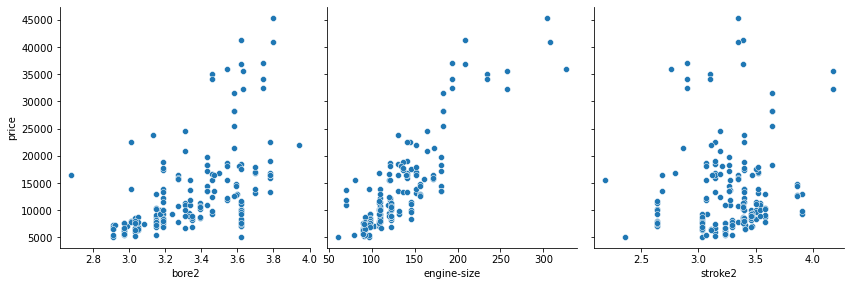

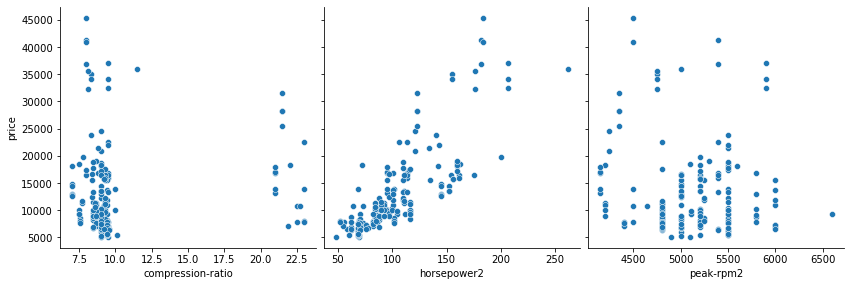

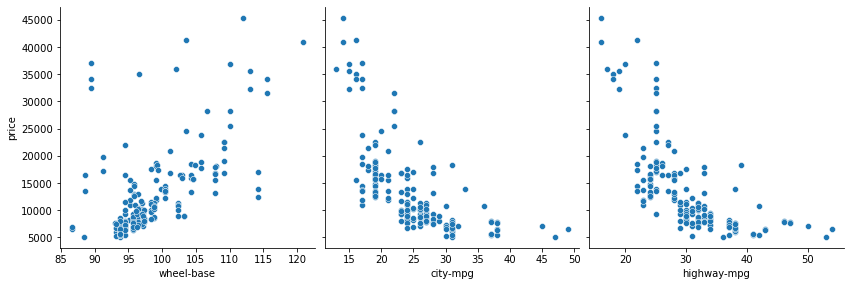

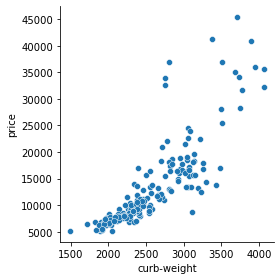

In [164]:
plt.figure(figsize=(10,20))
car_pair_plot('length', 'width','height')
car_pair_plot('bore2', 'engine-size','stroke2')
car_pair_plot('compression-ratio', 'horsepower2', 'peak-rpm2')
car_pair_plot('wheel-base', 'city-mpg', 'highway-mpg')
sns.pairplot(data=car_eda, x_vars='curb-weight', y_vars='price',diag_kind=None,size=4, aspect=1, kind='scatter')
plt.tight_layout()

 1. Positive Relationship With Price:  
     1.1 width, length and curb-weight seems to have a poitive correlation with price.

     1.2 Bore,Engine-Size,horsepower,wheel-base
     
     
 2. Negative Relationship With Price:
 
     2.1 city-mpeg,highway-mpeg
     
     
 3. Height doesn't show any significant trend with price.
 
 
 4. Strok2,Peak-rpm,compression ratio is too scatter/concentradted . 
    So we can not comment on their relationships with price at the moment
    

### 2.2.4 Find Co-relation between continuous dependent variables

<AxesSubplot:>

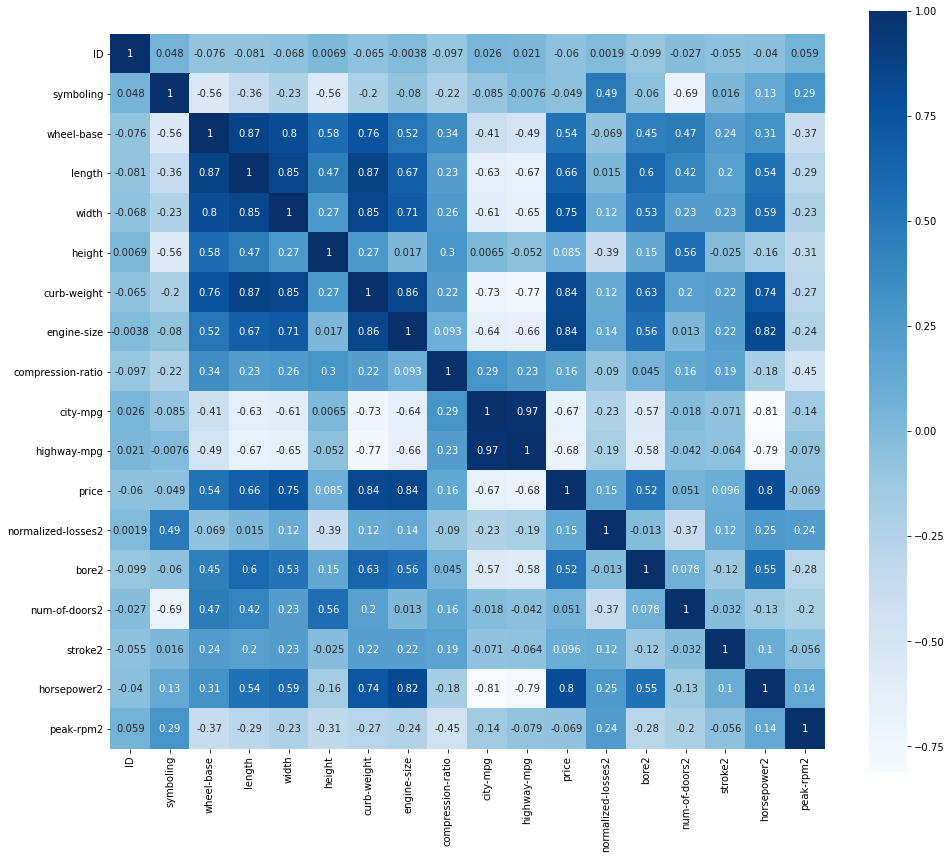

In [165]:
# Compute the correlation matrix
corr = car.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')


<AxesSubplot:>

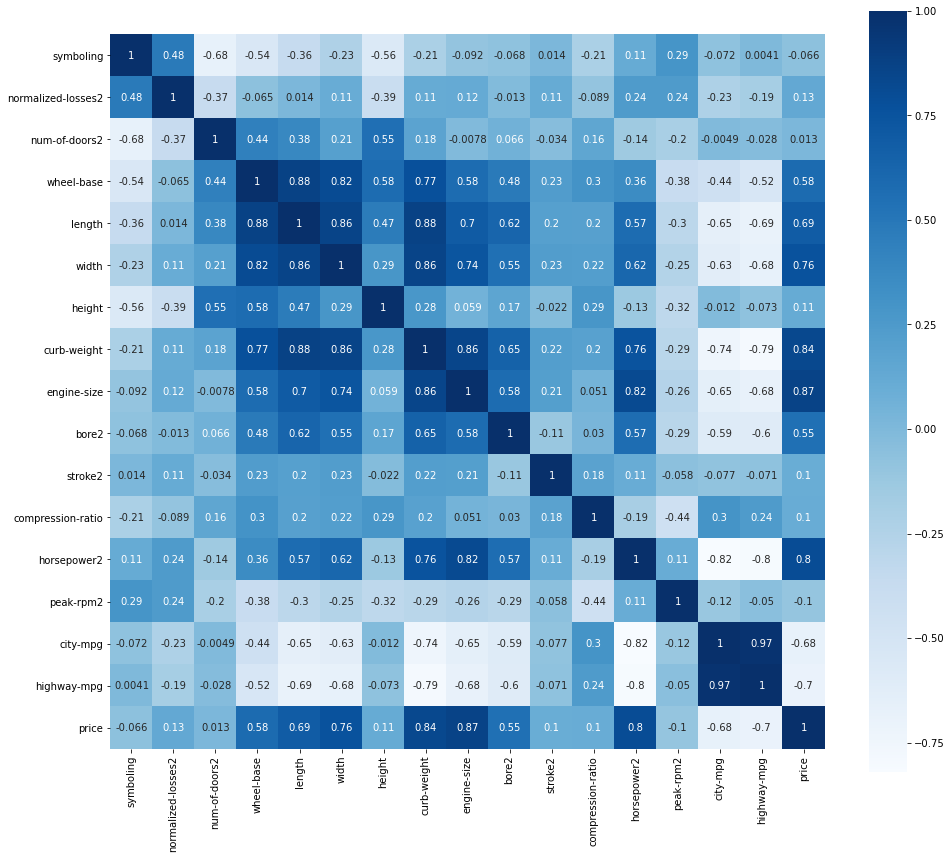

In [166]:
# Compute the correlation matrix
corr = car_eda.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')


#### Strong co -relation between 
    1. Length,Width with wheel-base a  0.88,.82 respectively
    2. Curb-Weight with engine size -0.88
    3. Curb-Wight And Width - 0.86
    4. Engine Size is also highly corelated with curb weight and number of cyliunders 
    5. City-mpeg and highway-mpeg are highly corelated
    
 
   We may ignore legth, Width in our model as they are closely co-related to wheel-base.
   
   We may ingnore highway mpeg as well.
   

## 3. New Features

In [167]:
# Fuel economy 
# Given more Wightage to city driving 
#car_eda['fueleconomy'] = (0.53 * car_eda['city-mpg']) + (0.47 * car_eda['highway-mpg'])
car_eda['fueleconomy'] = (1* car_eda['city-mpg']) + (0* car_eda['highway-mpg'])

In [168]:
#car_eda_ext['fueleconomy'] = (0.53 * car_eda_ext['city-mpg']) + (0.47 * car_eda_ext['highway-mpg'])
car_eda_ext['fueleconomy'] = (1* car_eda_ext['city-mpg']) + (0 * car_eda_ext['highway-mpg'])

#### As city-mpeg is co-related with highway we can ignore but above arrangement was made for try and testing. 

## 4. Bivariant Analysis

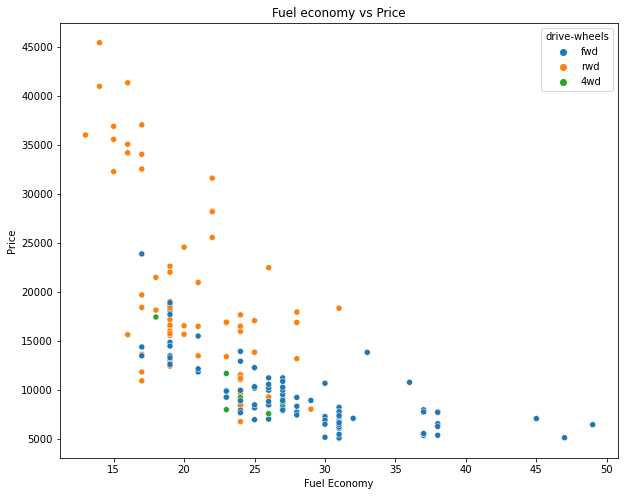

<Figure size 432x288 with 0 Axes>

In [169]:
plt.figure(figsize=(10,8))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=car_eda['fueleconomy'],y=car_eda['price'],hue=car_eda['drive-wheels'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

1. As expected there is negative corelation between fuel economy and price
2. Rear Wheel drive vehicle despaite being costly have less fuel economy as well.

In [170]:
car_eda.head()

,symboling,normalized-losses2,make,fuel-type,aspiration,num-of-doors2,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore2,stroke2,compression-ratio,horsepower2,peak-rpm2,city-mpg,highway-mpg,price,fueleconomy
0,-1,65.00000,toyota,gas,std,4,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31000,3.54000,8.70000,92.00000,4200.00000,27,32,11248,27
1,0,188.00000,bmw,gas,std,2,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121.00000,4250.00000,21,28,20970,21
2,0,120.86395,renault,gas,std,4,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46000,3.90000,8.70000,104.16760,5106.70391,23,31,9295,23
3,0,161.00000,peugot,diesel,turbo,4,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.70000,3.52000,21.00000,95.00000,4150.00000,28,33,13200,28
4,-2,103.00000,volvo,gas,std,4,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114.00000,5400.00000,24,28,15985,24


# List of significant variable after above analysis. 

### Note : Not considered height,stroke2,peak-rpm2,compression-ratio,make,engine-location

#### 1.  symboling
#### 2.  normalized-losses2
#### 3  fuel-type
#### 4.  aspiration
#### 5.  num-of-doors2
#### 6.  body-style
#### 7.  drive-wheels
#### 9.  wheel-base
#### 10. length
#### 11. width
#### 12. curb-weight
#### 13. engine-type
#### 14. num-of-cylinders
#### 15. engine-size
#### 16. horsepower2
#### 17. fueleconomy
#### 18. car-range
#### 19 bore2

In [171]:
# Restoring doors to string categorical variable

def getDoors(num:int ):
    if num==1:
        return "one"
    if num==2:
        return "two"
    if num==3:
        return "three"
    if num==4:
        return "four"
    if num==5:
        return "five"
    if num==6:
        return "six"
    if num==7:
        return "seven"
    else:
        return num.astype(str)


In [172]:
car_eda['num_doors'] = car_eda['num-of-doors2'].apply(lambda x : getDoors(x))

In [173]:
car_eda_ext['num_doors'] = car_eda_ext['num-of-doors2'].apply(lambda x : getDoors(x))

In [174]:
display(car_eda['num_doors'].value_counts())

four    104
two      77
Name: num_doors, dtype: int64

In [175]:
#car_eda.rename(columns={"bins":"car-range"},inplace=True)
car_eda.rename(columns={"normalized-losses2":"norm-losses","num-of-doors2":"doors", \
                        "horsepower2":"power-hp","bore2":"engine-bore", \
                        "bins":"car-range","stroke2":"engine-stroke"},inplace=True)

In [176]:
car_eda_ext.rename(columns={"normalized-losses2":"norm-losses","num-of-doors2":"doors", \
                        "horsepower2":"power-hp","bore2":"engine-bore", \
                        "bins":"car-range","stroke2":"engine-stroke"},inplace=True)

In [177]:

car_reg = car_eda[['symboling','norm-losses','fuel-type', \
                  'aspiration','num_doors','body-style','drive-wheels', \
                  'wheel-base','length','width','curb-weight','engine-type', 'engine-bore',\
                  'num-of-cylinders','engine-size','power-hp',\
                  'fueleconomy','price']] #'car-range',


In [178]:

car_reg_ext = car_eda_ext[['symboling','norm-losses','fuel-type', \
                  'aspiration','num_doors','body-style','drive-wheels', \
                  'wheel-base','length','width','curb-weight','engine-type', 'engine-bore',\
                  'num-of-cylinders','engine-size','power-hp',\
                  'fueleconomy']]

In [179]:
car_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         181 non-null    int64  
 1   norm-losses       181 non-null    float64
 2   fuel-type         181 non-null    object 
 3   aspiration        181 non-null    object 
 4   num_doors         181 non-null    object 
 5   body-style        181 non-null    object 
 6   drive-wheels      181 non-null    object 
 7   wheel-base        181 non-null    float64
 8   length            181 non-null    float64
 9   width             181 non-null    float64
 10  curb-weight       181 non-null    int64  
 11  engine-type       181 non-null    object 
 12  engine-bore       181 non-null    float64
 13  num-of-cylinders  181 non-null    object 
 14  engine-size       181 non-null    int64  
 15  power-hp          181 non-null    float64
 16  fueleconomy       181 non-null    int64  
 1

In [180]:
#data_profile = car_reg.profile_report(title="Car Price Profiling", progress_bar=False, minimal=True)
#data_profile.to_file(output_file="CarPrice-Profiling.html")

## 3. Regression 

### 3.1  Data Standardization**

In [181]:
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing    

In [182]:
le = preprocessing.LabelEncoder()
car_reg['fuel-type_lbl_encode'] = le.fit_transform(car_reg['fuel-type'])
car_reg['aspiration_lbl_encode'] = le.fit_transform(car_reg['aspiration'])
car_reg['num_doors_lbl_encode'] = le.fit_transform(car_reg['num_doors'])
car_reg['body-style_lbl_encode'] = le.fit_transform(car_reg['body-style'])
car_reg['drive-wheels_lbl_encode'] = le.fit_transform(car_reg['drive-wheels'])
car_reg['engine-type_lbl_encode'] = le.fit_transform(car_reg['engine-type'])
car_reg['num-of-cylinders_lbl_encode'] = le.fit_transform(car_reg['num-of-cylinders'])
 

In [183]:
car_reg_ext['fuel-type_lbl_encode'] = le.fit_transform(car_reg_ext['fuel-type'])
car_reg_ext['aspiration_lbl_encode'] = le.fit_transform(car_reg_ext['aspiration'])
car_reg_ext['num_doors_lbl_encode'] = le.fit_transform(car_reg_ext['num_doors'])
car_reg_ext['body-style_lbl_encode'] = le.fit_transform(car_reg_ext['body-style'])
car_reg_ext['drive-wheels_lbl_encode'] = le.fit_transform(car_reg_ext['drive-wheels'])
car_reg_ext['engine-type_lbl_encode'] = le.fit_transform(car_reg_ext['engine-type'])
car_reg_ext['num-of-cylinders_lbl_encode'] = le.fit_transform(car_reg_ext['num-of-cylinders'])

### Making feature columns

In [186]:
#feature_cols = ['TV', 'radio', 'newspaper']  
feature_cols = ['symboling','norm-losses','wheel-base','length','width','curb-weight','engine-bore',\
                'engine-size','power-hp',\
'fueleconomy','fuel-type_lbl_encode',\
                'aspiration_lbl_encode',\
                'num_doors_lbl_encode','body-style_lbl_encode',\
'drive-wheels_lbl_encode','engine-type_lbl_encode',\
                'num-of-cylinders_lbl_encode','price']


In [187]:
car_reg_feat = car_reg[feature_cols]


In [188]:

feature_cols_ext = ['symboling','norm-losses','wheel-base','length','width','curb-weight','engine-bore',\
                'engine-size','power-hp',\
'fueleconomy','fuel-type_lbl_encode',\
                'aspiration_lbl_encode',\
                'num_doors_lbl_encode','body-style_lbl_encode',\
'drive-wheels_lbl_encode','engine-type_lbl_encode',\
                'num-of-cylinders_lbl_encode']
car_reg_feat_ext = car_reg_ext[feature_cols_ext]

<AxesSubplot:>

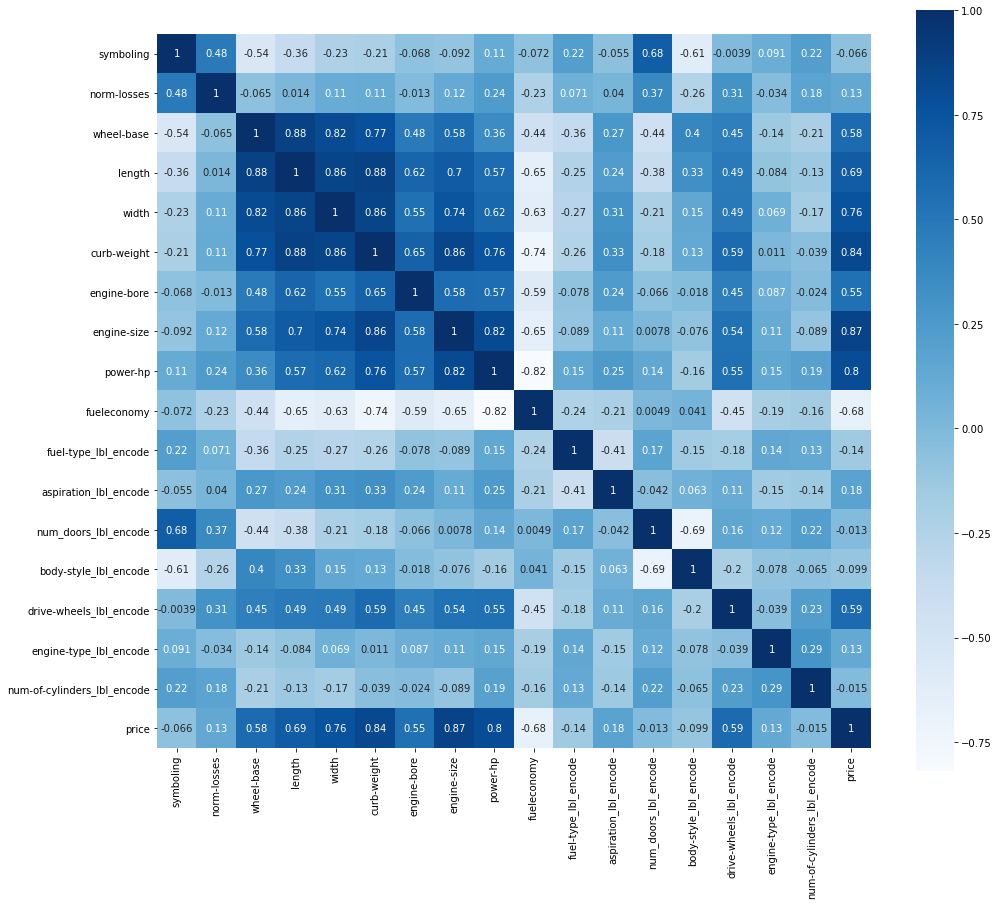

In [189]:
# Compute the correlation matrix
corr = car_reg_feat.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['norm-losses','wheel-base','length','width','curb-weight','engine-size','engine-bore','power-hp','fueleconomy']

car_reg_feat[num_vars] = scaler.fit_transform(car_reg_feat[num_vars])

In [191]:
num_vars_ext = ['norm-losses','wheel-base','length','width','curb-weight','engine-size','engine-bore','power-hp','fueleconomy']
car_reg_feat_ext[num_vars_ext] = scaler.fit_transform(car_reg_feat_ext[num_vars_ext])

 ### 3.2 Regresssion : Data Preparation

In [192]:
car_reg_feat.head()

,symboling,norm-losses,wheel-base,length,width,curb-weight,engine-bore,engine-size,power-hp,fueleconomy,fuel-type_lbl_encode,aspiration_lbl_encode,num_doors_lbl_encode,body-style_lbl_encode,drive-wheels_lbl_encode,engine-type_lbl_encode,num-of-cylinders_lbl_encode,price
0,-1,0.00000,0.46064,0.51493,0.52991,0.37626,0.50000,0.23019,0.20561,0.38889,1,0,0,2,1,2,2,11248
1,0,0.64398,0.42566,0.53284,0.38462,0.47401,0.50000,0.38868,0.34112,0.22222,1,0,1,3,2,2,3,20970
2,0,0.29248,0.27697,0.60299,0.52991,0.42320,0.61905,0.26792,0.26247,0.27778,1,0,0,4,1,2,2,9295
3,0,0.50262,0.62099,0.68060,0.69231,0.66292,0.80952,0.34340,0.21963,0.41667,0,1,0,3,2,1,2,13200
4,-2,0.19895,0.51603,0.71194,0.58974,0.56129,0.87302,0.30189,0.30841,0.30556,1,0,0,3,2,2,2,15985


In [193]:
y = car_reg_feat.pop('price')
X = car_reg_feat

In [194]:
#y_ext = car_reg_ext.pop('price')
X_ext = car_reg_feat_ext

In [195]:
X_ext.head()

,symboling,norm-losses,wheel-base,length,width,curb-weight,engine-bore,engine-size,power-hp,fueleconomy,fuel-type_lbl_encode,aspiration_lbl_encode,num_doors_lbl_encode,body-style_lbl_encode,drive-wheels_lbl_encode,engine-type_lbl_encode,num-of-cylinders_lbl_encode
0,-2,0.24576,0.51707,0.79346,0.75000,0.72714,1.00000,0.42857,0.46032,0.33333,1,0,0,1,1,2,1
1,0,0.96610,0.36585,0.54806,0.25000,0.61960,0.62097,0.62185,0.51587,0.23810,1,0,0,1,1,2,2
2,-1,0.00000,0.51707,0.79346,0.75000,0.90636,0.87097,0.33613,0.84127,0.04762,1,1,0,2,1,2,1
3,1,0.67797,0.00000,0.35378,0.04167,0.05194,0.34677,0.00000,0.09524,0.71429,1,0,0,1,0,2,1
4,1,0.24576,0.03902,0.41309,0.04167,0.08705,0.49194,0.05882,0.10317,0.71429,1,0,0,2,0,2,1


In [196]:
y.head()

0    11248
1    20970
2     9295
3    13200
4    15985
Name: price, dtype: int64

In [197]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [198]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (144, 17)
y_train shape:  (144,)

Test cases as below
X_test shape:  (37, 17)
y_test shape:  (37,)


# **4. Model Development & Evaluation**

1. **Load** the `algorithm`

2. **Instantiate** and **Fit** the model to the `training` dataset

3. **Prediction** on the `test` set

4. **Calculating** Root mean square error 

In [199]:
X_train.head()

,symboling,norm-losses,wheel-base,length,width,curb-weight,engine-bore,engine-size,power-hp,fueleconomy,fuel-type_lbl_encode,aspiration_lbl_encode,num_doors_lbl_encode,body-style_lbl_encode,drive-wheels_lbl_encode,engine-type_lbl_encode,num-of-cylinders_lbl_encode
47,2,0.36126,0.34402,0.52388,0.45299,0.41234,0.74603,0.32075,0.31776,0.30556,1,0,1,2,2,2,2
85,0,0.50262,0.62099,0.68060,0.69231,0.61559,0.61905,0.22264,0.21963,0.16667,1,0,0,3,2,1,2
118,1,0.31414,0.28280,0.46716,0.43590,0.35493,0.38889,0.18491,0.31776,0.27778,1,1,0,3,1,2,2
147,0,0.22513,0.40233,0.64925,0.52991,0.60978,0.59524,0.45283,0.48598,0.16667,1,0,0,3,1,4,3
91,1,0.33508,0.35569,0.54776,0.52991,0.34794,0.56349,0.23019,0.16822,0.36111,1,0,1,2,1,2,2


In [200]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

### 4.1 Interpreting Model Coefficients

In [201]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 9199.970288539178
Coefficients: [  217.11701072 -2664.12135499  6598.19707628 -4590.52623895
  2538.10482973  7231.84043106 -1717.10756222 10710.94995069
 21538.22409466 -2236.52361642 -4575.5875197  -2987.72429275
  -838.17832705  -845.08049071  1359.09731521   317.86275719
  -764.40617701]


In [202]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

In [203]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 9199.970288539178
symboling 217.11701071639914
norm-losses -2664.121354990558
wheel-base 6598.197076280008
length -4590.526238946251
width 2538.1048297293373
curb-weight 7231.840431057328
engine-bore -1717.1075622156143
engine-size 10710.949950692122
power-hp 21538.22409465566
fueleconomy -2236.5236164174435
fuel-type_lbl_encode -4575.587519700376
aspiration_lbl_encode -2987.7242927505945
num_doors_lbl_encode -838.1783270543142
body-style_lbl_encode -845.080490710671
drive-wheels_lbl_encode 1359.0973152108922
engine-type_lbl_encode 317.8627571948292
num-of-cylinders_lbl_encode -764.406177006602


### 4.2 Using the Model for Prediction

In [204]:
y_pred_train = linreg.predict(X_train)  

In [205]:
y_pred_test = linreg.predict(X_test)       

#### Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

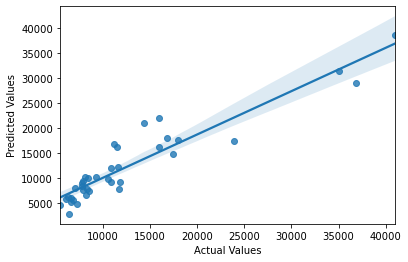

In [206]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### **4.3 Model evaluation** 

1. __Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [207]:
from sklearn import metrics

In [208]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 2425.4290595148145
MAE for test set is 2199.76776296756


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Price predictions

In [209]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [210]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 11106213.210269984
MSE for test set is 8965503.534113782


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [211]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3332.598567224979
RMSE for test set is 2994.245069147444


In [212]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3332.598567224979
RMSE for test set is 2994.245069147444


### **4.4 Model Evaluation using R-squared and Adjusted R-squared value**

In [213]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8252432623805391
R2 score for test set is 0.8751997258882813


In [214]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8016649723842626
Adjusted R2 score for test set is 0.7635363227356909


In [215]:
((r2_train - adj_r_squared_train)/r2_train)*100, ((r2_test - adj_r_squared_test)/r2_test)*100

(2.8571320810619394, 12.758619529874505)

##### As adjusted R square on test  is very less that r square train we need to remove some fatures which are highly corelated 
   1. We may ignore legth, Width in our model as they are closely co-related to wheel-base
   2. We may also remove bore & number of cyliders (domain knowledge) as based on it engine size is calculated.

##### Also to make Adjusted R sqaure value more closure to R sqaure (~ 2%) , we may remove above related or derived fatures as below.
#### But during this process RMSE may increased , hence chosen optimum way.

In [216]:
#feature_cols = ['TV', 'radio', 'newspaper']  
feature_cols = ['symboling','norm-losses','wheel-base', \
                #'length',\
                #'width',\
                'curb-weight', \
                #'engine-bore',\
                'engine-size',\
                'power-hp',\
                'fueleconomy',\
                'fuel-type_lbl_encode',\
                'aspiration_lbl_encode',\
                'num_doors_lbl_encode',\
                'body-style_lbl_encode',\
                'drive-wheels_lbl_encode',\
                'engine-type_lbl_encode',\
                #'num-of-cylinders_lbl_encode'
                #'price'
               ]

In [217]:
#y = car_reg.pop('price')
X = car_reg[feature_cols]
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


Train cases as below
X_train shape:  (144, 13)
y_train shape:  (144,)

Test cases as below
X_test shape:  (37, 13)
y_test shape:  (37,)


In [218]:
X_ext = car_reg_ext[feature_cols]

In [219]:
linreg.fit(X_train, y_train) 
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: -18521.181201078136
Coefficients: [ 1.12318436e+02 -1.07296687e+01  1.85666981e+02  1.92301866e+00
  5.36156416e+01  8.54471673e+01 -3.87299472e+01 -4.11555966e+03
 -2.28071256e+03 -7.57491000e+02 -1.03817464e+03  1.04223424e+03
  3.13224421e+02]


Text(0, 0.5, 'Predicted Values')

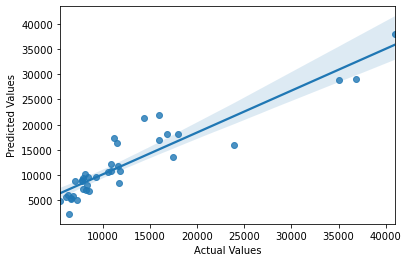

In [220]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)   
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [221]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 2516.4356359059957
MAE for test set is 2301.1443887058317


In [222]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 11442821.919887576
MSE for test set is 10578591.5791049


In [223]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3382.7240383879343
RMSE for test set is 3252.474685390326


In [224]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8199467100063536
R2 score for test set is 0.8527454566534047


In [225]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8019413810069889
Adjusted R2 score for test set is 0.7695146278053291


**Observation**

- The **R-squared** value and **Adjusted R-squared** values for the **training** set is found to be **0.8191** and **0.8026** respectively

- The **R-squared** value and **Adjusted R-squared** values for the **test** set is found to be **0.8453** and **0.7680** respectively

In [226]:
((r2_train - adj_r_squared_train)/r2_train)*100, ((r2_test - adj_r_squared_test)/r2_test)*100

(2.1959145368392505, 9.760336827206869)

In [227]:
y_pred_ext = linreg.predict(X_ext)  

In [228]:
df_y_pred_ext = pd.DataFrame(y_pred_ext,columns=['price'])
df_ID = pd.DataFrame(car_ext['ID'])

In [229]:
df_submit = df_ID.merge(df_y_pred_ext,how='inner',left_index=True, right_index=True)
#df_submit,y_pred_ext
#df_submit

,ID,price
0,1,18038.86509
1,2,18401.97856
2,3,19358.66794
3,4,6068.54984
4,5,6279.18343
5,6,10105.42259
6,7,18362.57376
7,8,15780.43338
8,9,7683.98487
9,10,6407.13968


In [230]:
df_submit.to_csv('submission.csv', index=False, header=False)